In [70]:

def from_date():
    """ TO GET 30 DAYS BACK DATE """
    try:
        now = datetime.now()
        date_str = datetime(now.year, now.month - 1, now.day - 1).strftime('%m/%d/%Y')
        return date_str
    except Exception as e:
        print("Error at from_date() = ",e)


def to_date():
    """ TO GET CURRENT DATE """
    try:
        now = datetime.now()
        date_str = datetime(now.year, now.month, now.day - 1).strftime('%m/%d/%Y')
        return date_str
    except Exception as e:
        print("Error at to_date() = ",e)


def show_img():
    """ TO SHOW IMAGE TO USER """
    try:
        img = Image.open("ss.png")
        border = (430, 395, 630, 400) # left, up, right, bottom
        ImageOps.crop(img, border).save("xx.png") #saveing new croped image
        img=mpimg.imread('xx.png') #using matplotlib to show image
        imgplot = plt.imshow(img)
        plt.show()
    except Exception as e:
        print("Error at show_img() = ",e)
    

In [71]:
def login():
    """ TO LOGIN INTO THE PORTAL """
    try:

        to_date_str = to_date()
        from_date_str = from_date()
        driver.get("https://public.escambiaclerk.com/BMWebLatest/Home.aspx/Search")
        # To load Website Completely
        time.sleep(10)
        # To enter the dates from and to
        DateFrom = driver.find_element_by_id('openedFrom')
        DateFrom.click()
        DateFrom.send_keys(from_date_str)

        DateTo = driver.find_element_by_id('openedTo')
        DateTo.click()
        DateTo.send_keys(to_date_str)
        time.sleep(2) 
        driver.find_element_by_xpath('//*[@id="mainTableContent"]/tbody/tr/td/table/tbody/tr[2]/td[2]').click()
        driver.find_element_by_xpath('//*[@id="courTypesButton"]').click()
        driver.find_element_by_xpath('//*[@id="courTypesMultiSelect"]/ul/li[1]/a/label/input').click()
        time.sleep(2) 
        driver.find_element_by_xpath('//*[@id="courTypesMultiSelect"]/ul/li[3]/a/label/input').click()
        driver.find_element_by_xpath('//*[@id="mainTableContent"]/tbody/tr/td/table/tbody/tr[2]/td[2]').click()
        #Second DropDownList
        javaScript = 'document.getElementsByClassName("multiselect dropdown-toggle btn")[1].click();'
        driver.execute_script(javaScript)
        time.sleep(2) 
        javaScript = 'document.getElementsByClassName("checkbox")[17].click();'
        driver.execute_script(javaScript)
        time.sleep(3) 
        for i in range(28,31):
            javaScript = 'document.getElementsByClassName("checkbox")['+str(i)+'].click();'
            driver.execute_script(javaScript)
        for i in range(52,55):
            javaScript = 'document.getElementsByClassName("checkbox")['+str(i)+'].click();'
            driver.execute_script(javaScript)
        for i in range(75,78):
            javaScript = 'document.getElementsByClassName("checkbox")['+str(i)+'].click();'
            driver.execute_script(javaScript)
        driver.find_element_by_xpath('//*[@id="mainTableContent"]/tbody/tr/td/table/tbody/tr[2]/td[2]').click()
        time.sleep(1)
        javaScript = 'document.getElementsByClassName("checkbox")[116].click();'
        driver.execute_script(javaScript)
        javaScript = 'document.getElementsByClassName("checkbox")[117].click();'
        driver.execute_script(javaScript)

        # To take screenshot 
        driver.save_screenshot('ss.png')
        time.sleep(2)

        # To show image to user for calculation
        show_img()
        time.sleep(1)

        # To accept addition 
        num = int(input("Enter the addition value = "))
        value = driver.find_element_by_xpath('//*[@id="mainTableContent"]/tbody/tr/td/table/tbody/tr[2]/td[2]/div/div/form/input[1]')
        value.send_keys(str(num)) #sending enter value
        time.sleep(2)
        # Remove images
        os.remove("ss.png")
        os.remove("xx.png")

        # To Click on search Buttoon
        driver.find_element_by_xpath('//*[@id="searchButton"]').click()
        time.sleep(10)
        print("Login Done... !!!")
        
    except Exception as e:
        print("Error at login() = ",e)
        print("Burn the code Again .... !!!")
        
        
def clean_link():
    """ TO CLEAN THE ACQUIRED LINKS """
    try:
        global clean_link
        clean_link=[]
        for i in unclean_link:
            href = str(i).split(' ')[1]
            start = re.search('\=\"\/',href).span()
            clean_link.append("https://public.escambiaclerk.com/"+href[start[1]:-1])
        #print(clean_link)
    except Exception as e:
        clean_link.append("0")
        print("Error at clean_link() = ",e)

    
def date_checker():
    """ TO SET THE DATE TO A CORRECT FORMAT """
    global case_date
    case_date = []
    try:
        for i in range(len(c_date)):
            a=c_date[i]
            if(len(a.split("/")[0])==1):
                x = "0"+a.split("/")[0]
            else:
                x = a.split("/")[0]

            if(len(a.split("/")[1])==1):
                y = "0"+a.split("/")[1]
            else:
                y = a.split("/")[1]
            case_date.append(y+"/"+x+"/"+a.split("/")[2])
            print(y+"/"+x+"/"+a.split("/")[2])
    except Exception as e:
        case_date.append("0")
        print("Error at date_checker() = ",e)

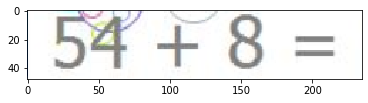

Enter the addition value = 62
Login Done... !!!
07/05/2020
30/04/2020
30/04/2020


In [72]:
"""########## MODULES REQUIRED TO LOAD FOR THIS PROGRAM TO RUN ##########"""
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from selenium import webdriver
from datetime import datetime
from bs4 import BeautifulSoup
from datetime import date
from PIL import ImageOps
from PIL import Image 
import pandas as pd
import pytesseract
import pyautogui
import requests
import random
import PyPDF2 
import json
import mouse
import time 
import glob
import os
import re

"""########## DECLARATIONS ##########"""
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe"
base_dir = os.path.abspath(os.path.dirname("__file__"))
# Different Proxys 
# 192.41.71.199:3128   50.246.120.125:8080  157.230.44.213:8080  74.121.98.90:8080  192.41.71.221:3128
PROXY =     "192.41.71.199:3128" #"74.121.98.90:8080"      #"192.144.215.244:3128"  
options = webdriver.ChromeOptions()
# APP STATE
appState = {
    "recentDestinations": [
        {
            "id": "Save as PDF",
            "origin": "local",
            "account": ""
        }
    ],
    "selectedDestinationId": "Save as PDF",
    "version": 2
}
# PROFILE
profile = {'printing.print_preview_sticky_settings.appState': json.dumps(appState)}
# Experimental Options
options.add_experimental_option('prefs',  {
    "download.default_directory": base_dir,
    "download.prompt_for_download": False,
    "download.directory_upgrade": True,
    "plugins.always_open_pdf_externally": True
    }
)
# Headless Options
options.headless = False 
# options.add_argument('--proxy-server=%s' % PROXY)
options.add_experimental_option('prefs', profile)
options.add_argument('--kiosk-printing')
path = "C:\\Users\\Dishant\\Desktop\\chromedriver\\chromedriver"


"""########## MAIN PROGRAM ##########"""

global driver , from_date_str , to_date_str 

"""# STEP 1 LOGIN AND COLLECT CASE NUMBER #"""
driver = webdriver.Chrome(executable_path = path , options = options)
login()                           # to login
time.sleep(5)    

"""# STEP 2 COLLECT LINKS AND CLEAN THEM #"""

content = driver.page_source
soup = BeautifulSoup(content, "html.parser")
""" This function helps to collect links from the page source """
global unclean_link
unclean_link = []
for row in soup.findAll('a',attrs={'title':'Case Details'}):
    unclean_link.append(row)

#clean the unclean_links 
clean_link()


"""# STEP 3 COLLECT DATA FROM EACH CLEAN LINK AND CLEAN DATA #"""

global c_date , bank_n , def_name , calim_val , case_no , case_type
c_date=[]
bank_n=[]
case_no=[]
def_name=[]
claim_val=[]
case_type=[]

for i in range(0,len(clean_link)):
    try:
        #to check clen_link value to be "0" and skip that iteration
        if(clean_link[i]=="0"):
            continue
            
        time.sleep(2)
        a='window.open("http://bings.com","_blank");'
        driver.execute_script(a.replace("http://bings.com",clean_link[i]))
        time.sleep(10)
        driver.switch_to.window(driver.window_handles[0])
        driver.switch_to.window(driver.window_handles[1])
        # Collecting text out of xpaths and appending them to respective lists
        date = driver.find_element_by_xpath('//*[@id="summaryAccordionCollapse"]/div/div[1]/div[1]/div[3]/div[2]').text #Date
        time.sleep(4)
        c_t = driver.find_element_by_xpath('//*[@id="summaryAccordionCollapse"]/div/div[1]/div[3]/div[1]/div[2]').text #Doc_type
        time.sleep(4)
        data_3 = driver.find_element_by_xpath('//*[@id="page_header"]/table/tbody/tr/td[1]').text
        c_n = data_3.split("-")[0]
        d_n = data_3.split("vs.")[1]
        b_n = data_3.split("-")[1].split("vs.")[0]

        c_date.append(date)
        bank_n.append(b_n)
        case_no.append(c_n)
        def_name.append(d_n)
        claim_val.append("0")
        case_type.append(c_t)
        driver.close()
        driver.switch_to.window(driver.window_handles[0])
        
    except Exception as e:
        
        c_date.append("0")
        bank_n.append("0")
        case_no.append("0")
        def_name.append("0")
        claim_val.append("0")
        case_type.append("0")    
        print("Error at collecting_data = ",e)
        driver.close()
        driver.switch_to.window(driver.window_handles[0])

# Changing and cleaning date format 
date_checker()
# Quit the driver
driver.quit()
# Checking for lenght of all the lists ..... !!!!
# print(case_date , bank_n , def_name , claim_val , case_no , case_type)
print(len(case_date),len(bank_n),len(def_name),len(claim_val),len(case_no),len(case_type))

# Creating DataFrame 
dataset = pd.DataFrame({'CaseId':case_no,'CaseDate':case_date,'CaseType':case_type,'BankName':bank_n,'DefendentName':def_name,
                          'RealValueString':claim_val})

# convert dataset to CSV file... !!
# dataset.to_csv("Escambia_County.csv")

In [ ]:
        
def collect_case_no():
    """ TO COLLECT ALL THE CASE NUMBERS """
    try:
        table = driver.find_element_by_id("gridSearchResults")
        rows = table.find_elements_by_tag_name("tr")

        # To get all data from the search table
        global data_row
        data_row  =  []
        for index in range(1,len(rows)):
            data_row.append(rows[index].text)
        #print(data_row)
        #print(len(data_row))

        # To get all CASE_NUMBERS
        global 
        case_no = []
        for i in data_row:
            cn = re.search("\d{3,4}\sCA\s\d{4,6}",i).group()
            case_no.append(cn)
        print(case_no)
        #print(len(case_no))
        
    except Exception as e:
        driver.quit()
        print("Error at collect_case_no() = ",e)


In [ ]:

for i in range(0,len(case_no)):
    try:
        driver = webdriver.Chrome(executable_path = path , options = options)
        time.sleep(5)
        driver.get("http://dory.escambiaclerk.com/LandmarkWeb1.4.6.134/home/index")
        time.sleep(20)
        driver.find_element_by_xpath('//*[@id="bodySection"]/div/div/div[3]/div/div[3]/a/img').click()
        time.sleep(5)
        driver.find_element_by_xpath('//*[@id="idAcceptYes"]').click()
        time.sleep(25)
        #driver.find_element_by_xpath('//*[@id="caseNumber"]').click()
        time.sleep(15)
        driver.find_element_by_xpath('//*[@id="caseNumber"]').send_keys(case_no[i])
        time.sleep(10)
        driver.find_element_by_xpath('//*[@id="submit-CaseNumber"]').click()
        time.sleep(20)
        driver.execute_script('document.getElementsByClassName(" tablecell")[17].click();')
        time.sleep(30)
        
        # Collecting text out of xpaths and appending them to respective lists
        c_date.append(driver.find_element_by_xpath('//*[@id="documentInformationParent"]/table/tbody/tr[3]/td[2]').text)#Date
        time.sleep(4)
        doc_type.append(driver.find_element_by_xpath('//*[@id="documentInformationParent"]/table/tbody/tr[6]/td[2]').text)#Doc_type
        time.sleep(4)
        bank_n.append(driver.find_element_by_xpath('//*[@id="documentInformationParent"]/table/tbody/tr[7]/td[2]').text)#bank
        time.sleep(4)
        def_name.append(driver.find_element_by_xpath('//*[@id="documentInformationParent"]/table/tbody/tr[8]/td[2]').text)#def name
        time.sleep(4)
        claim_val.append(driver.find_element_by_xpath('//*[@id="documentInformationParent"]/table/tbody/tr[9]/td[2]').text)#claim_value
        
        # To download the PDF
        #driver.find_element_by_xpath('//*[@id="idPrintGroup"]').click()
        time.sleep(2)
        #driver.find_element_by_xpath('//*[@id="DocumentPrintButtonAll"]/a').click()
        #time.sleep(5)
        #driver.switch_to.alert.accept()
        #time.sleep(20)
        driver.quit()
        time.sleep(2)
        
    except Exception as e:
        c_date.append("0")
        bank_n.append("0")
        def_name.append("0")
        claim_val.append("0")
        doc_type.append("0")
        driver.quit()
        print("Error at collect_data() = ",e)

# Checking the lenght and data of all lists
print(len(c_date),len(bank_n),len(def_name),len(claim_val),len(doc_type))
print("\n",c_date , bank_n , def_name , claim_val , doc_type)

# Cleanning the data collected
clean_c_date()              #clean the c_date[]
clean_def_name()            #clean the def_name[]

# Creating DataFrame 
dataset = pd.DataFrame({'CaseId':case_no,'CaseDate':case_date,'CaseType':doc_type,'BankName':bank_n,'DefendentName':def_n,
                          'RealValueString':claim_val})
dataset
dataset.to_csv("Escambia_County.csv")

In [ ]:

def PDFadd():
    """CODE FOR PDF address extraction"""
    try: 
        global add
        #Using GLOB module
        fn = glob.glob("C:\\Users\\Dishant\\Downloads\\*.pdf")
        FN = fn[0]
        print("Filename = ",FN)
        filename = FN       
        pages = convert_from_path(filename, 500)
        print("\nNumber of Pages found in PDF = ",len(pages))
        trials=0
        start = ""
        end = ""
        add=""
        found = False
        for page in pages:
            add=""
            page.save('C:\\Users\\Dishant\\Downloads\\add_img.jpg', 'JPEG')
            address_txt = str(((pytesseract.image_to_string(Image.open('C:\\Users\\Dishant\\Downloads\\add_img.jpg'))))).lower()
            try:
                add=""
                # If UNKNOWN is there 
                start = re.search(r'unknown',address_txt).span()
                end = address_txt[start[1]:]
                Unkonwn_Found = True
                if(Unkonwn_Found):
                    try:
                        add=""
                        print("UNKNOWN FOUND")
                        ############ First Attempt
                        try:
                            add = re.search("\d{2,5}\s[\b\w,@\s]*\sfl\s\d{4,5}\-\d{3,5}", end).group()
                            print(add)
                            print("Address_Found in Attempt = 1")
                            print("1")
                            comp_address.append(add)
                            break
                        except Exception as e:
                            add = re.search(r'\d{2,5}\s[\b\w,@\s]*\sfl\s\d{4,5}', end).group()
                            print(add)
                            print("Address_Found in (Exception)Attempt = 1")
                            print("2")
                            comp_address.append(add)
                            break
                    except Exception as e:
                        add=""
                        ############ Second Attempt
                        try:
                            add = re.search("\d{2,5}\s[\b\w,@\s]*\sflorida\s\d{4,5}\-\d{3,5}", end).group()
                            print(add)
                            print("Address_Found in Attempt = 2")
                            print("3")
                            comp_address.append(add)
                            break
                        except Exception as e:
                            add = re.search("\d{2,5}\s[\b\w,@\s]*\sflorida\s\d{4,5}", end).group()
                            print(add)
                            print("Address_Found in (Exception)Attempt = 2")
                            print("4")
                            comp_address.append(add)
                            break

            except Exception as e:
                add=""
                try:
                    add=""
                    print("UNKNOWN NOT FOUND")
                    ############ First Attempt
                    try:
                        add = re.search("\d{2,5}\s[\b\w,@\s]*\sfl\s\d{4,5}\-\d{3,5}", address_txt).group()
                        print(add)
                        print("Address_Found in Attempt = 1")
                        print("5")
                        comp_address.append(add)
                        break
                    except Exception as e:
                        add = re.search(r'\d{2,5}\s[\b\w,@\s]*\sfl\s\d{4,5}', address_txt).group()
                        print(add)
                        print("Address_Found in (Exception)Attempt = 1")
                        print("6")
                        comp_address.append(add)
                        break
                except Exception as e:
                    add=""
                    ############ Second Attempt
                    try:
                        add = re.search("\d{2,5}\s[\b\w,@\s]*\sflorida\s\d{4,5}\-\d{3,5}", address_txt).group()
                        print(add)
                        print("Address_Found in Attempt = 2")
                        print("7")
                        comp_address.append(add)
                        break
                    except Exception as e:
                        add = re.search("\d{2,5}\s[\b\w,@\s]*\sflorida\s\d{4,5}", address_txt).group()
                        print(add)
                        print("Address_Found in (Exception)Attempt = 2")
                        print("8")
                        comp_address.append(add)
                        break
    except Exception as e:
        print("ERROR")
        # If add is empty .....  
    if(add==""):
        comp_address.append("NAF")
    os.remove('C:\\Users\\Dishant\\Downloads\\add_img.jpg')
    os.remove(filename)
    #print("ITERATION at PDFadd() exception = ",CASE_NUM)
    #os.close(filename)


In [ ]:
PDFadd()

In [ ]:
"""Duck typing"""
class Duck:
    def fly(self):
        print("Duck flying")

class Sparrow:
    def fly(self):
        print("Sparrow flying")

class Whale:
    def swim(self):
        print("Whale swimming")

for animal in Duck(), Sparrow(), Whale():
    animal.fly()